# 1. Import Library

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('../data/insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
## target variable : smoker : Classification / Binary 

## Features : age, sex, bmi , children, region, charges

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
X = data.drop('smoker', axis=1)

In [ ]:
y = data['smoker']

In [ ]:
data['smoker'].replace({'yes':1, 'no':0})

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
X

,age,sex,bmi,children,region,charges
0,19,female,27.900,0,southwest,16884.92400
1,18,male,33.770,1,southeast,1725.55230
2,28,male,33.000,3,southeast,4449.46200
3,33,male,22.705,0,northwest,21984.47061
4,32,male,28.880,0,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830
1334,18,female,31.920,0,northeast,2205.98080
1335,18,female,36.850,0,southeast,1629.83350
1336,21,female,25.800,0,southwest,2007.94500


In [ ]:
y

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [ ]:
X_transformed = pd.get_dummies(X)

In [ ]:
# One - Hot Encoding
# Sex
# Male 
# Female


#3 Sex_male Sex_female
# 0      1          0



# 4 Region : North , south , east , west
# Region        1.    0    0    0
#               0    0    1    0    
#               0    1    0    0    


# North 1 0 0 0
# South 0 1 0 0
# East  0 0 1 0
# West  0 0 0 1


# target Encoder / Ordinal Encoding : Order categroca

North : 1
South : 2
East  : 3
West  : 4 # west 



# 2. Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# 3. Model Building 

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

logistic_model.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = model.predict(x_test)

# 4. Model Evalution

### Classifation : Accuracy, Precision , Recall , F1 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test, y_pred) * 100

97.01492537313433

In [ ]:
accuracy_score(y_test, y_pred) * 100

96.01990049751244

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.99      0.97      0.98       323
         yes       0.89      0.97      0.93        79

    accuracy                           0.97       402
   macro avg       0.94      0.97      0.95       402
weighted avg       0.97      0.97      0.97       402



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.99      0.96      0.97       323
         yes       0.86      0.95      0.90        79

    accuracy                           0.96       402
   macro avg       0.92      0.96      0.94       402
weighted avg       0.96      0.96      0.96       402



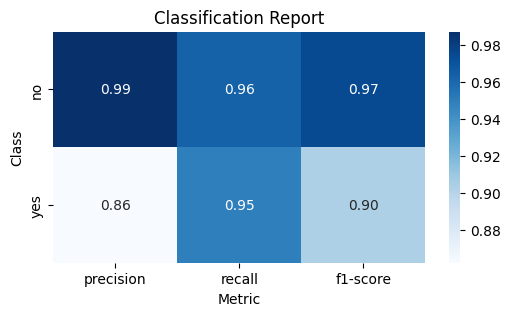

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns

import matplotlib.pyplot as plt

# Generate the classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Select only precision, recall, and f1-score for classes
metrics = ['precision', 'recall', 'f1-score']
class_names = y_test.unique()
plot_df = report_df.loc[class_names, metrics]

plt.figure(figsize=(6, 3))
sns.heatmap(plot_df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report")
plt.ylabel("Class")
plt.xlabel("Metric")
plt.show()

In [ ]:
report_df

,precision,recall,f1-score,support
no,0.987302,0.962848,0.974922,323.000000
yes,0.862069,0.949367,0.903614,79.000000
accuracy,0.960199,0.960199,0.960199,0.960199
macro avg,0.924685,0.956108,0.939268,402.000000
weighted avg,0.962691,0.960199,0.960909,402.000000


In [ ]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker'>

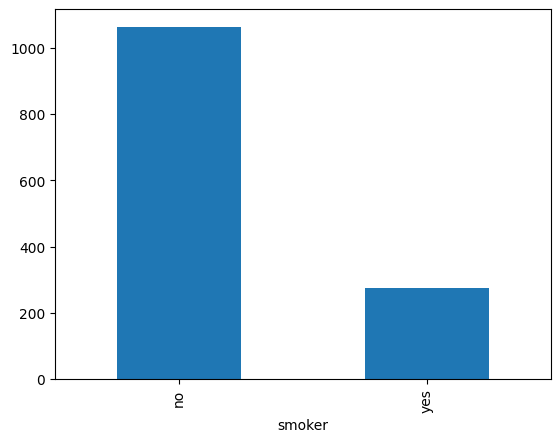

In [ ]:
data['smoker'].value_counts().plot(kind='bar')  # 0 - No , 1 - Yes

<Axes: xlabel='smoker', ylabel='count'>

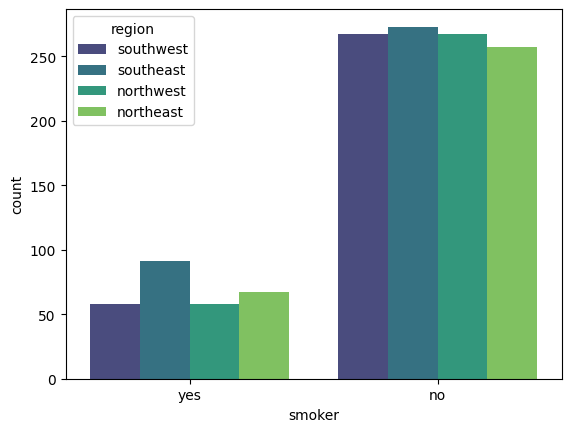

In [ ]:
import seaborn as sns

sns.countplot(data = data, x='smoker', hue='region', palette='viridis')

In [ ]:
pd.to_pickle(model, 'random_forest_model.pkl')

In [ ]:
import joblib

In [ ]:
train_model = joblib.load('random_forest_model.pkl')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_transformed_scaled = scaler.fit_transform(X_transformed)

In [ ]:
## 

In [ ]:
print(x_transformed_scaled)

[[-1.43876426 -0.45332    -0.90861367 ... -0.56641788 -0.61132367
   1.76548098]
 [-1.50996545  0.5096211  -0.07876719 ... -0.56641788  1.63579466
  -0.56641788]
 [-0.79795355  0.38330685  1.58092576 ... -0.56641788  1.63579466
  -0.56641788]
 ...
 [-1.50996545  1.0148781  -0.90861367 ... -0.56641788  1.63579466
  -0.56641788]
 [-1.29636188 -0.79781341 -0.90861367 ... -0.56641788 -0.61132367
   1.76548098]
 [ 1.55168573 -0.26138796 -0.90861367 ...  1.76548098 -0.61132367
  -0.56641788]]


In [ ]:
x_test.iloc[2]

age                          64
bmi                      26.885
children                      0
charges             29330.98315
sex_female                 True
sex_male                  False
region_northeast          False
region_northwest           True
region_southeast          False
region_southwest          False
Name: 890, dtype: object

In [ ]:
x_test.iloc[0].values.reshape(1, -1)

array([[45, 25.175, 2, 9095.06825, True, False, True, False, False,
        False]], dtype=object)

In [ ]:
train_model.predict(x_test.iloc[0].values.reshape(1, -1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['no'], dtype=object)

In [ ]:
new_data = pd.read_csv('../data/new_insurance.csv')

In [ ]:
new_data.drop('smoker', axis=1, inplace=True)

In [ ]:
pd.get_dummies(new_data)

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,False,False,True
1,18,33.770,1,1725.55230,False,True,False,False,True,False
2,28,33.000,3,4449.46200,False,True,False,False,True,False
3,33,22.705,0,21984.47061,False,True,False,True,False,False
4,32,28.880,0,3866.85520,False,True,False,True,False,False
5,31,25.740,0,3756.62160,True,False,False,False,True,False
6,46,33.440,1,8240.58960,True,False,False,False,True,False
7,37,27.740,3,7281.50560,True,False,False,True,False,False
8,37,29.830,2,6406.41070,False,True,True,False,False,False
9,60,25.840,0,28923.13692,True,False,False,True,False,False


In [ ]:
train_model.predict(pd.get_dummies(new_data))

array(['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'],
      dtype=object)